In [1]:
from pyspark import SparkConf, SparkContext
sc = SparkContext.getOrCreate()

In [2]:
import numpy as np

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


In [5]:
# Converting textfile to a numpy array of float type
def parse(line):
    return np.array([float(x) for x in line.split(' ')])

def Euclidean_distance(point1, point2):
    return np.sum((point1 - point2) ** 2)

def Manhattan_distance(point1, point2):
    return np.sum(np.absolute(point1 - point2))

# Find the closest center for the given point
def find_closest_center(point, centers, type_dis='E'):
    bestIndex = 0
    closest_distance = float("inf")
    for i in range(len(centers)):
        
        tempDist = Euclidean_distance(point ,centers[i]) if type_dis=='E' else Manhattan_distance(point ,centers[i])
        if tempDist < closest_distance:
            closest_distance = tempDist
            bestIndex = i
    return bestIndex

# (centroid,(p,1))
def cost(point, centers, cost_type = 'E'):
    if cost_type =='E':
        return Euclidean_distance(point[1][0], centers[point[0]])
    else:
        return Manhattan_distance(point[1][0], centers[point[0]])

In [6]:
data_lines = sc.textFile('q1\\data\\data.txt')
c1_lines = sc.textFile('q1\\data\\c1.txt')
c2_lines = sc.textFile('q1\\data\\c2.txt')

In [7]:
data = data_lines.map(parse).cache()
c1 = c1_lines.map(parse).collect()
c2 = c2_lines.map(parse).collect()

In [23]:
def kmeans(data, centers, max_iter, type_dis='E'):
    kmeans_cost = np.zeros(max_iter)
    for i in range(max_iter):
        if((i+1)%5 == 0):
            print("Iteration #{}".format(i+1))
        closest = data.map(lambda p: (find_closest_center(p, centers, type_dis), (p, 1)))
        kmeans_cost[i] = sum(closest.map(lambda p: cost(p, centers, type_dis)).collect())
        pointStats = closest.reduceByKey(lambda p1_c1, p2_c2: (p1_c1[0] + p2_c2[0], p1_c1[1] + p2_c2[1]))
        newPoints = pointStats.map(lambda st: (st[0], st[1][0] / st[1][1])).collect()
        for (j, p) in newPoints:
                centers[j] = p
    
    return kmeans_cost

In [25]:
max_iter = 5
cost_c2_M = kmeans(data, c2, max_iter, 'M')
print("First five costs after running kmeans by Manhattan distance on c2 clusters are {}".format(cost_c2_M[0:5]))
cost_c1_M = kmeans(data, c1, max_iter, 'M')
print("First five costs after running kmeans by Manhattan distance on c1 clusters are {}".format(cost_c1_M[0:5]))
cost_c1_E = kmeans(data, c1, max_iter, 'E')
cost_c2_E = kmeans(data, c2, max_iter, 'E')
print("First five costs after running kmeans by Euclidean distance on c1 clusters are {}".format(cost_c1_E[0:5]))
print("First five costs after running kmeans by Euclidean distance on c2 clusters are {}".format(cost_c2_E[0:5]))


Iteration #5
First five costs after running kmeans by Manhattan distance on c2 clusters are [1433739.30999999 1084488.77696487  973431.71466204  895934.59256307
  865128.33529408]
Iteration #5
First five costs after running kmeans by Manhattan distance on c1 clusters are [485419.19007333 489575.80854096 490327.53969447 490079.30003551
 478290.86962211]
Iteration #5
Iteration #5
First five costs after running kmeans by Euclidean distance on c1 clusters are [4.21203499e+08 3.17476756e+08 2.15588160e+08 2.00736514e+08
 2.00193188e+08]
First five costs after running kmeans by Euclidean distance on c2 clusters are [1.61826756e+08 1.50100431e+08 1.37276023e+08 1.20889506e+08
 1.11674993e+08]


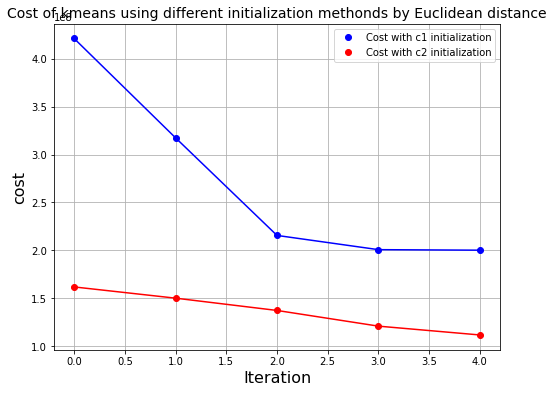

In [26]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(0,max_iter),cost_c1_E, 'bo', label='Cost with c1 initialization')
ax.plot(range(0,max_iter),cost_c1_E, 'k', color='blue')
ax.plot(range(0,max_iter),cost_c2_E, 'bo', color='red', label='Cost with c2 initialization')
ax.plot(range(0,max_iter),cost_c2_E, 'k', color='red')
ax.set_xlabel('Iteration',fontsize=16)
ax.set_ylabel('cost',fontsize=16)
ax.set_title('Cost of kmeans using different initialization methonds by Euclidean distance', fontsize=14)
ax.grid(True)
ax.legend()

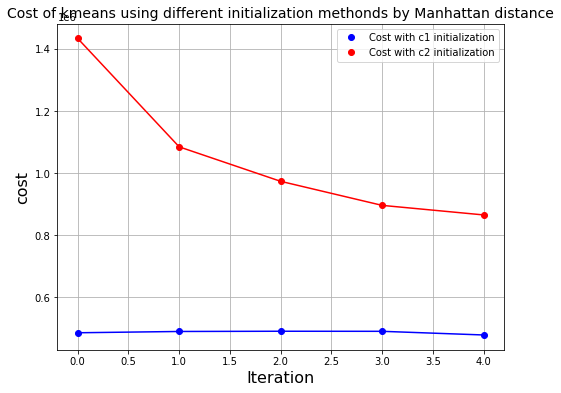

In [27]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(0,max_iter),cost_c1_M, 'bo', label='Cost with c1 initialization')
ax.plot(range(0,max_iter),cost_c1_M, 'k', color='blue')
ax.plot(range(0,max_iter),cost_c2_M, 'bo', color='red', label='Cost with c2 initialization')
ax.plot(range(0,max_iter),cost_c2_M, 'k', color='red')
ax.set_xlabel('Iteration',fontsize=16)
ax.set_ylabel('cost',fontsize=16)
ax.set_title('Cost of kmeans using different initialization methonds by Manhattan distance', fontsize=14)
ax.grid(True)
ax.legend()

inf

In [8]:
c2

[array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
          0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
        278.   ,   1.   ]),
 array([1.9000e-01, 0.0000e+00, 3.8000e-01, 0.0000e+00, 0.0000e+00,
        1.9000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9000e-01, 1.9000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.8000e-01, 0.0000e+00, 1.9000e-01, 1.1400e+00, 0.0000e+00,
        3.8000e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+